In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import os,sys
from datetime import datetime
import matplotlib.pyplot as plt


### SAM timescale (tau)

In [2]:
SAMpath = '/work/bk1377/b382037/WP7/To_Share/SAM_results/'
ERA5_timescale  = np.loadtxt(SAMpath+'ERA51980_2014_timescale.out')
ERA5_error      = np.loadtxt(SAMpath+'ERA51980_2014_std_bootstraptime1000.out')
ERA5e_timescale = np.loadtxt(SAMpath+'ERA51958_1978_Jul2Jun_timescale.out')
ERA5e_error     = np.loadtxt(SAMpath+'ERA51958_1978_Jul2Jun_std_bootstraptime1000.out')

ICONctl_timescale  = np.loadtxt(SAMpath+'icon-esm-er_eerie-control-1950_Jul2Jun_timescale.out')
#ICON_error    = np.loadtxt('eerie-control-1950_v20231106_Jul2Jun_std_bootstraptime1000.out')
ICONhist_timescale = np.loadtxt(SAMpath+'icon-esm-er_hist-1950_until2014_Jul2Jun_timescale.out')
ICONhist_error     = np.loadtxt(SAMpath+'icon-esm-er_hist-1950_until2014_Jul2Jun_std_bootstraptime1000.out')

IFSFESOMctl_timescale = np.loadtxt(SAMpath+'ifs-fesom2-sr_eerie-control-1950_Jul2Jun_timescale.out')
IFSFESOMctl_error     = np.loadtxt(SAMpath+'ifs-fesom2-sr_eerie-control-1950_Jul2Jun_std_bootstraptime1000.out')
IFSFESOMhist_timescale= np.loadtxt(SAMpath+'ifs-fesom2-sr_hist-1950_1950to2014_Jul2Jun_timescale.out')
IFSFESOMhist_error    = np.loadtxt(SAMpath+'ifs-fesom2-sr_hist-1950_1950to2014_Jul2Jun_std_bootstraptime1000.out')

HADGEMctl_timescale= np.loadtxt(SAMpath+'MO_HadGEM_piControl_HH_Jul2Jun_timescale.out')
HADGEMctl_error    = np.loadtxt(SAMpath+'MO_HadGEM_piControl_HH_Jul2Jun_std_bootstraptime1000.out')

AMIP28_timescale= {}
AMIP28_error={}
for exp in range(5):
    AMIP28_timescale[exp]= np.loadtxt(SAMpath+'ifs-amip_28km_hist_ens'+str(exp+1)+'_Jul2Jun_timescale.out')
    AMIP28_error[exp]    = np.loadtxt(SAMpath+'ifs-amip_28km_hist_ens'+str(exp+1)+'_Jul2Jun_std_bootstraptime1000.out')
    
AMIP9_timescale= np.loadtxt(SAMpath+'ifs-amip_9km_hist_Jul2Jun_timescale.out')
AMIP9_error    = np.loadtxt(SAMpath+'ifs-amip_9km_hist_Jul2Jun_std_bootstraptime1000.out')


In [3]:
ERA5_tau = np.mean(ERA5_timescale)
ERA5_NDJtau = np.mean(ERA5_timescale[123:215])
ERA5_std = np.mean(ERA5_error)
ERA5_NDJstd = np.mean(ERA5_error[123:215])

ERA5e_tau = np.mean(ERA5e_timescale)
ERA5e_NDJtau = np.mean(ERA5e_timescale[123:215])
ERA5e_std = np.mean(ERA5e_error)
ERA5e_NDJstd = np.mean(ERA5e_error[123:215])

IFSFESOMctl_tau = np.mean(IFSFESOMctl_timescale)
IFSFESOMctl_NDJtau = np.mean(IFSFESOMctl_timescale[123:215])
IFSFESOMctl_std = np.mean(IFSFESOMctl_error)
IFSFESOMctl_NDJstd = np.mean(IFSFESOMctl_error[123:215])

IFSFESOMhist_tau = np.mean(IFSFESOMhist_timescale)
IFSFESOMhist_NDJtau = np.mean(IFSFESOMhist_timescale[123:215])
IFSFESOMhist_std = np.mean(IFSFESOMhist_error)
IFSFESOMhist_NDJstd = np.mean(IFSFESOMhist_error[123:215])

ICONctl_tau = np.mean(ICONctl_timescale)
ICONctl_NDJtau = np.mean(ICONctl_timescale[123:215])

ICONhist_tau = np.mean(ICONhist_timescale)
ICONhist_NDJtau = np.mean(ICONhist_timescale[123:215])
ICONhist_std = np.mean(ICONhist_error)
ICONhist_NDJstd = np.mean(ICONhist_error[123:215])

HADGEMctl_tau = np.mean(HADGEMctl_timescale)
HADGEMctl_NDJtau = np.mean(HADGEMctl_timescale[123:215])
HADGEMctl_std = np.mean(HADGEMctl_error)
HADGEMctl_NDJstd = np.mean(HADGEMctl_error[123:215])

AMIP9_tau = np.mean(AMIP9_timescale)
AMIP9_NDJtau = np.mean(AMIP9_timescale[123:215])
AMIP9_std = np.mean(AMIP9_error[exp])
AMIP9_NDJstd = np.mean(AMIP9_error[123:215])

AMIP28_tau = {}
AMIP28_NDJtau = {}
AMIP28_std = {}
AMIP28_NDJstd = {}
for exp in range(5):
    AMIP28_tau[exp] = np.mean(AMIP28_timescale[exp])
    AMIP28_NDJtau[exp] = np.mean(AMIP28_timescale[exp][123:215])
    AMIP28_std[exp] = np.mean(AMIP28_error[exp])
    AMIP28_NDJstd[exp] = np.mean(AMIP28_error[exp][123:215])

In [4]:
CMIPmodel = { 
      1:'TaiESM1',
      2:'AWI-ESM-1-1-LR',
      3:'AWI-ESM-1-REcoM',
      4:'BCC-CSM2-MR',
      5:'BCC-ESM1',
      6:'FGOALS-f3-L',
      7:'FGOALS-g3',
      8:'CanESM5',
      9:'IITM-ESM',
      10:'CNRM-CM6-1',
      11:'CNRM-CM6-1-HR',
      12:'CNRM-ESM2-1',
      13:'ACCESS-CM2',
      14:'EC-Earth3',
      15:'MPI-ESM-1-2-HAM',
      16:'INM-CM4-8',
      17:'INM-CM5-0',
      18:'IPSL-CM6A-LR',
      19:'MIROC6',
      20:'MPI-ESM1-2-HR',
      21:'MPI-ESM1-2-LR',
      22:'MRI-ESM2-0',
      23:'GISS-E2-1-G',
      24:'GISS-E2-1-G',
      25:'CESM2',
      26:'CESM2-FV2',
      27:'CESM2-WACCM',
      28:'CESM2-WACCM-FV2',
      29:'NorESM2-LM',
      30:'NorESM2-MM',
      31:'GFDL-CM4'
      }

CMIPinst = { 
      1:'AS-RCEC',
      2:'AWI',
      3:'AWI',
      4:'BCC',
      5:'BCC',
      6:'CAS',
      7:'CAS',
      8:'CCCma',
      9:'CCCR-IITM',
      10:'CNRM-CERFACS',
      11:'CNRM-CERFACS',
      12:'CNRM-CERFACS',
      13:'CSIRO-ARCCSS',
      14:'EC-Earth-Consortium',
      15:'HAMMOZ-Consortium',
      16:'INM',
      17:'INM',
      18:'IPSL',
      19:'MIROC',
      20:'MPI-M',
      21:'MPI-M',
      22:'MRI',
      23:'NASA-GISS',
      24:'NASA-GISS',
      25:'NCAR',
      26:'NCAR',
      27:'NCAR',
      28:'NCAR',
      29:'NCC',
      30:'NCC',
      31:'NOAA-GFDL'
      }

CMIPvariant = { 
      1:'r1i1p1f1',
      2:'r1i1p1f1',
      3:'r1i1p1f1',
      4:'r1i1p1f1',
      5:'r1i1p1f1',
      6:'r1i1p1f1',
      7:'r1i1p1f1',
      8:'r1i1p1f1',
      9:'r1i1p1f1',
      10:'r1i1p1f2',
      11:'r1i1p1f2',
      12:'r1i1p1f2',
      13:'r1i1p1f1',
      14:'r1i1p1f1',
      15:'r1i1p1f1',
      16:'r1i1p1f1',
      17:'r1i1p1f1',
      18:'r1i1p1f1',
      19:'r1i1p1f1',
      20:'r1i1p1f1',
      21:'r1i1p1f1',
      22:'r1i1p1f1',
      23:'r1i1p1f1',
      24:'r1i1p1f2',
      25:'r1i1p1f1',
      26:'r1i1p1f1',
      27:'r1i1p1f1',
      28:'r1i1p1f1',
      29:'r1i1p1f1',
      30:'r1i1p1f1',
      31:'r1i1p1f1'
      }


In [5]:
CMIPatmres_lon= { 
      1:1.25,
      2:1.9,
      3:1.9,
      4:1.1,
      5:2.8,
      6:1.3,
      7:2,
      8:2.8,
      9:1.89,
      10:1.4,
      11:0.5,
      12:1.4,
      13:1.9,
      14:0.7,
      15:1.9,
      16:2,
      17:2,
      18:2.5, 
      19:1.4,
      20:0.9,
      21:1.9,
      22:1.1,
      23:2.5, 
      24:2.5,
      25:1.3,
      26:2.5,
      27:1.3,
      28:2.5,
      29:2.5,
      30:1.25,
      31:1,
      }

In [6]:
CMIPatmres_lat= { 
      1: 0.9,
      2: 1.9,
      3: 1.9,
      4: 1.1,
      5: 2.8,
      6: 1,
      7: 2.3,
      8: 2.8,
      9: 1.89, 
      10: 1.4,
      11: 0.5,
      12: 1.4,
      13: 1.3,
      14: 0.7,
      15: 1.9, 
      16: 1.5,
      17: 1.5,
      18: 1.3,
      19: 1.4,
      20: 0.9,
      21: 1.9,
      22: 1.1,
      23: 2,
      24: 2,
      25: 0.9,
      26: 1.9,
      27: 0.9,
      28: 1.9,
      29: 1.9,
      30: 0.94,
      31: 1, 
      }

In [7]:
CMIPoceres_lat= { 
      1: 1, 
      2: 0.9,
      3: 0.9,
      4: 1,
      5: 1, 
      6: 1, 
      7: 1,
      8: 1,
      9: 0.5,
      10: 1,
      11: 0.25,
      12: 1,
      13: 1,
      14: 1,
      15: 1.5,
      16: 0.56,
      17: 0.5,
      18: 1,
      19: 1,
      20: 0.4,
      21:  1.5,
      22:  1,
      23: 1.25,  
      24: 1.25, 
      25: 1,
      26: 1, 
      27: 1,
      28: 1, 
      29: 1,
      30: 1,
      31: 0.25
      }

In [8]:
CMIPoceres_lon= { 
      1: 1,
      2: 0.9,
      3: 0.9,
      4: 1,
      5: 1,
      6: 1,
      7: 1,
      8: 1,
      9: 0.5,
      10: 1,
      11: 0.25,
      12: 1,
      13: 1, 
      14: 1,
      15: 1.5,
      16: 1,
      17: 0.25,
      18: 1,
      19: 1,
      20: 0.4,
      21: 1.5,
      22: 0.5,
      23: 1,
      24: 1,
      25: 1,
      26: 1,
      27: 1,
      28: 1, 
      29: 1,
      30: 1,
      31: 0.25
      }

In [9]:
CMIPpath='/work/bk1377/b382037/WP7/CMIP6/'

In [10]:
CMIP6_timescale = {}
for exp in range(31):
    CMIP6_timescale[exp] = np.loadtxt(CMIPpath+CMIPinst[exp+1]+'_'+CMIPmodel[exp+1]+'_'+CMIPvariant[exp+1]+'_SAMtimescale.out')

In [11]:
CMIP6_tau = {}
CMIP6_NDJtau = {}
for exp in range(31):
    CMIP6_tau[exp] = np.mean(CMIP6_timescale[exp])
    CMIP6_NDJtau[exp] = np.mean(CMIP6_timescale[exp][123:215])

In [12]:
print(min(CMIP6_tau.values()))
print(min(CMIP6_NDJtau.values()))

7.086825855642092
9.467269348001638


In [13]:
df_tau = pd.DataFrame.from_dict([CMIP6_tau, CMIP6_NDJtau]).transpose()
#df_NDJtau = pd.DataFrame.from_dict([CMIP6_NDJtau]).transpose()

In [14]:
df_tau =df_tau.rename(columns={0: "CMIP6 Annual", 1:"CMIP6 NDJ"})

In [15]:
df_tau

,CMIP6 Annual,CMIP6 NDJ
0,8.180124,11.553734
1,12.011076,21.206208
2,14.080288,25.082484
3,11.156162,21.491341
4,14.204910,30.176346
5,11.417501,16.589999
6,9.378138,12.206699
7,10.210112,14.462730
8,13.215756,22.542028
9,11.251765,18.684069


CMIP6 median [11.17536936]
ERA5 early 10.256420757939757
ERA5 late 7.888424788458866
IFSFESOMhist 11.320459621360147
IFSFESOMctl 12.545218381476143
ICONhist 6.491973096137235
ICONctl 8.058773696690011
eerie median [9.07655078]
ERA5 7.888424788458866
AMIP9 7.6694307930442935
AMIP28 10.29679102912331
AMIP28 10.608492055666527
AMIP28 9.047352119878724
AMIP28 7.984333063965896
AMIP28 9.33273062388738
CMIP6 max [9.467269348001638, 9.5964722062864, 11.55373387150175, 12.206698717181144, 12.428039278864038, 12.636778995553344, 12.841335327821955, 13.028900444743522, 13.370281565961443, 13.937618514231131, 14.248424924849171, 14.462729870103871, 15.229587143568976, 15.54181377777528, 16.326809686478672, 16.58999919823459, 16.95551503770317, 17.314386681321352, 18.684068682433598, 20.166018996888834, 20.31992774329405, 21.20620824817956, 21.49134065514503, 22.542027953085693, 22.905015545742057, 23.352740955391344, 24.2699065267495, 25.082483852219212, 26.997120802358953, 30.176345993382093, 32

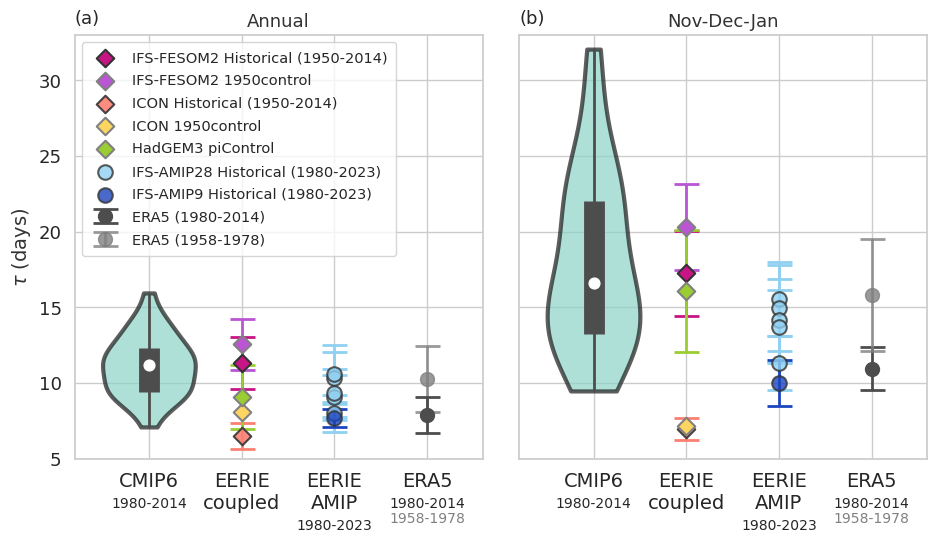

In [21]:
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

#df = datasets[0]

#f, ax = plt.subplots(figsize=(9, 5))
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(11, 5.5))

# ANNUAL =======================================

### ERA5: 1980-2014 
#left, bottom, width, height = (0.1, ERA5_tau-ERA5_std, 2.3, 2*ERA5_std)
#rect = plt.Rectangle((left, bottom), width, height,
#                     facecolor="black", alpha=0.1)
#ax1.add_patch(rect)
#ax1.hlines(ERA5_tau, xmin=left, xmax=left+width, color='k', linestyle='--', lw=1.5, zorder=10, label='ERA5 1980-2014')
ax1.errorbar(2.5, ERA5_tau, yerr=ERA5_std, fmt='o', ms=10,capsize=9, capthick=2, elinewidth=2, color='0.3', zorder=10,label='ERA5 (1980-2014)')

### ERA5: 1958-1978 
#left, bottom, width, height = (0.5-0.4, ERA5e_tau-ERA5e_std, 0.3, 2*ERA5e_std)
#rect = plt.Rectangle((left, bottom), width, height,
#                     facecolor="black", alpha=0.1)
#ax1.add_patch(rect)
#ax1.hlines(ERA5e_tau, xmin=left, xmax=left+width, color='k', linestyle=':', lw=1.5, zorder=10, label='ERA5 1958-1978')
ax1.errorbar(2.5, ERA5e_tau, yerr=ERA5e_std, fmt='o',ms=10, capsize=9, capthick=2,elinewidth=2, color='gray', alpha=0.8,zorder=1,  label='ERA5 (1958-1978)')

### CMIP6
parts = ax1.violinplot(
        df_tau.iloc[:,0], positions=[1], showmeans=False, showmedians=False,
        showextrema=False,points=500)

#for pc in parts['bodies']:
for count, pc in enumerate(parts['bodies']):
    #print(pc)
    #pc.set_facecolor('#8dd3c7')
    if count == 0:
        pc.set_facecolor('#8dd3c7')
    else:
        pc.set_facecolor('#ffffb3')
    pc.set_edgecolor('k')
    pc.set_alpha(0.7)
    pc.set_linewidth(3)
    
df_tau_sorted = [sorted(df_tau.iloc[:, 0].to_numpy())]
quartile1, medians, quartile3 = np.percentile(df_tau_sorted, [25, 50, 75], axis=1)

whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(df_tau_sorted, quartile1, quartile3)])
whiskersMin, whiskersMax = whiskers[:, 0], whiskers[:, 1]
inds = np.arange(1, len(medians) + 1, 1.5)
ax1.scatter(inds, medians, marker='o', color='white', s=60, zorder=3)
ax1.vlines(inds, quartile1, quartile3, color='0.3', linestyle='-', lw=15)
ax1.vlines(inds, whiskersMin, whiskersMax, color='0.3', linestyle='-', lw=2)
print('CMIP6 median', medians)
print('ERA5 early',ERA5e_tau)
print('ERA5 late',ERA5_tau)

#--------------------------

xann = 1.5
# For EERIE coupled annual values
ax1.errorbar(xann, IFSFESOMhist_tau, yerr=IFSFESOMhist_std, fmt='none', ms=9,capsize=9, capthick=2, elinewidth=2, color='mediumvioletred',zorder=1)
ax1.errorbar(xann, IFSFESOMctl_tau, yerr=IFSFESOMctl_std, fmt='none', ms=9,capsize=9, capthick=2, elinewidth=2, color='mediumorchid',zorder=1)
ax1.errorbar(xann, ICONhist_tau, yerr=ICONhist_std, fmt='none', ms=9,capsize=9, capthick=2, elinewidth=2, color='#fb8072',zorder=1)
ax1.errorbar(xann, HADGEMctl_tau, yerr=HADGEMctl_std, fmt='none', ms=9,capsize=9, capthick=2, elinewidth=2, color='yellowgreen',zorder=1)
ax1.scatter(xann, IFSFESOMhist_tau, marker='D', color='mediumvioletred', edgecolor='0.2', linewidth=1.5, s= 80, alpha=1,label='IFS-FESOM2 Historical (1950-2014)')
ax1.scatter(xann, IFSFESOMctl_tau, marker='D', color='mediumorchid', edgecolor='gray', linewidth=1.5, s= 80, alpha=1,label='IFS-FESOM2 1950control')
ax1.scatter(xann, ICONhist_tau, marker='D', color='#fb8072', edgecolor='0.2', linewidth=1.5, s= 80, alpha=0.9,label='ICON Historical (1950-2014)')
ax1.scatter(xann, ICONctl_tau, marker='D', color='#fdd662', edgecolor='gray', linewidth=1.5, s= 80, alpha=1,label='ICON 1950control')
ax1.scatter(xann, HADGEMctl_tau, marker='D', color='yellowgreen', edgecolor='gray', linewidth=1.5, s= 80, alpha=1,label='HadGEM3 piControl')
#ax.scatter(xann, ERA5_tau, marker='*', color='k', linewidth=2, s= 100, alpha=1)
eerie= np.array([IFSFESOMhist_tau, IFSFESOMctl_tau, ICONhist_tau, ICONctl_tau, HADGEMctl_tau])
eerie_medians = np.percentile(eerie, [50], axis=0)
print('IFSFESOMhist', IFSFESOMhist_tau)
print('IFSFESOMctl', IFSFESOMctl_tau)
print('ICONhist', ICONhist_tau)
print('ICONctl', ICONctl_tau)
print('eerie median', eerie_medians)
print('ERA5',ERA5_tau)
print('AMIP9',AMIP9_tau)
for exp in range(5):
    print('AMIP28', AMIP28_tau[exp])

# For EERIE AMIP annual values
#ax.scatter(xann+0.5, ERA5_tau, marker='*', color='k', linewidth=2, s= 100, alpha=1)
    if exp == 0:
        label='IFS-AMIP28 Historical (1980-2023)'
    else:
        label=None
    ax1.errorbar(xann+0.5, AMIP28_tau[exp], yerr=AMIP28_std[exp], fmt='none', ms=9,capsize=9, capthick=2, elinewidth=2, color='#90d0f0',zorder=1)
    ax1.scatter(xann+0.5, AMIP28_tau[exp], marker='o', color='#90d0f0', edgecolor='0.2', linewidth=1.5, s= 110, alpha=0.8,label=label,zorder=100)
ax1.errorbar(xann+0.5, AMIP9_tau, yerr=AMIP9_std, fmt='none', ms=9,capsize=9, capthick=2, elinewidth=2, color='#1d45bf',zorder=1)
ax1.scatter(xann+0.5, AMIP9_tau, marker='o', color='#1d45bf', edgecolor='0.2', linewidth=1.5, s= 110, alpha=0.8,label='IFS-AMIP9 Historical (1980-2023)',zorder=100)

ax1.set_xticks([1,1.5,2, 2.5], labels=['CMIP6', 'EERIE\ncoupled', 'EERIE\nAMIP','ERA5'],fontsize=14)
ax1.set_yticks(np.arange(5,33,5),labels=np.arange(5,33,5),fontsize=13)
ax1.set_ylim(5,33)
ax1.set_xlim(0.6,2.8)
#sns.despine(left=True)

#f.suptitle('Chick weights by feed type', fontsize=18, fontweight='bold')
#ax1.set_xlabel("Models",size = 16,alpha=0.7)
#ax1.set_ylabel("SAM e-folding timescale (days)",size = 16,alpha=0.7)
ax1.set_ylabel(r"$\tau$"" (days)",size = 14, c='0.2')
ax1.set_title('Annual', size = 13, color='0.2')
ax1.legend(loc='upper left',fontsize=10.5,labelspacing=0.6,borderaxespad=0.5,borderpad=0.6)

plt.text(0.0, 1.06, '(a)', fontsize=13, horizontalalignment='left',
         verticalalignment='top',
         transform = ax1.transAxes)

# Labelling the years 
ax1.text(2.5, 2.5, '1980-2014', fontsize=10,
         horizontalalignment='center',
         verticalalignment='top')
ax1.text(2.5, 1.5, '1958-1978', fontsize=10,
         horizontalalignment='center',
         verticalalignment='top',color='gray')
ax1.text(1, 2.5, '1980-2014', fontsize=10,
         horizontalalignment='center',
         verticalalignment='top')
#ax1.text(1.5, 0.9, '1950-/1850', fontsize=10,
#         horizontalalignment='center',
#         verticalalignment='top',color='gray')
ax1.text(2, 1.0, '1980-2023', fontsize=10,
         horizontalalignment='center',
         verticalalignment='top')
# NDJ ==========================================================
parts = ax2.violinplot(
        df_tau.iloc[:,1], positions=[1], showmeans=False, showmedians=False,
        showextrema=False,points=500)

#for pc in parts['bodies']:
for count, pc in enumerate(parts['bodies']):
    #print(pc)
    #pc.set_facecolor('#8dd3c7')
    if count == 0:
        pc.set_facecolor('#8dd3c7')
    else:
        pc.set_facecolor('#ffffb3')
    pc.set_edgecolor('k')
    pc.set_alpha(0.7)
    pc.set_linewidth(3)
    
df_tau_sorted = [sorted(df_tau.iloc[:, 1].to_numpy())]
quartile1, medians, quartile3 = np.percentile(df_tau_sorted, [25, 50, 75], axis=1)

whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(df_tau_sorted, quartile1, quartile3)])
whiskersMin, whiskersMax = whiskers[:, 0], whiskers[:, 1]
inds = np.arange(1, len(medians) + 1, 1.5)
ax2.scatter(inds, medians, marker='o', color='white', s=60, zorder=3)
ax2.vlines(inds, quartile1, quartile3, color='0.3', linestyle='-', lw=15)
ax2.vlines(inds, whiskersMin, whiskersMax, color='0.3', linestyle='-', lw=2)

#left, bottom, width, height = (0.1, ERA5_NDJtau-ERA5_NDJstd, 2.3, 2*ERA5_NDJstd)
#rect = plt.Rectangle((left, bottom), width, height,
#                     facecolor="black", alpha=0.1)
#ax2.add_patch(rect)
#ax1.hlines(ERA5_tau, xmin=left, xmax=left+width, color='k', linestyle='--', lw=1.5, zorder=10, label='ERA5 1980-2014')
ax2.errorbar(2.5, ERA5_NDJtau, yerr=ERA5_NDJstd, fmt='o', ms=10,capsize=9, capthick=2,elinewidth=2, color='0.3')
### ERA5: 1958-1978 
#left, bottom, width, height = (1-0.4, ERA5e_tau-ERA5e_std, 1.8, 2*ERA5e_std)
#rect = plt.Rectangle((left, bottom), width, height,
#                     facecolor="black", alpha=0.1)
#ax1.add_patch(rect)
#ax2.hlines(ERA5e_NDJtau, xmin=left+0.75, xmax=left+width-0.75, color='k', linestyle=':', lw=1.5, zorder=10, label='ERA5 1958-1978')
ax2.errorbar(2.5, ERA5e_NDJtau, yerr=ERA5e_NDJstd, fmt='o',ms=10, capsize=9, capthick=2,elinewidth=2, color='gray', alpha=0.8,zorder=100)

print('CMIP6 max', max(df_tau_sorted))
print('CMIP6 median', medians)
print('ERA5 early',ERA5e_NDJtau)
print('ERA5 late',ERA5_NDJtau)
# For EERIE coupled NDJ values
xNDJ=1.5
ax2.errorbar(xNDJ, IFSFESOMhist_NDJtau, yerr=IFSFESOMhist_NDJstd, fmt='none', ms=9,capsize=9, capthick=2, elinewidth=2, color='mediumvioletred',zorder=1)
ax2.errorbar(xNDJ, IFSFESOMctl_NDJtau, yerr=IFSFESOMctl_NDJstd, fmt='none', ms=9,capsize=9, capthick=2, elinewidth=2, color='mediumorchid',zorder=1)
ax2.errorbar(xNDJ, ICONhist_NDJtau, yerr=ICONhist_NDJstd, fmt='none', ms=9,capsize=9, capthick=2, elinewidth=2, color='#fb8072',zorder=1)
ax2.errorbar(xNDJ, HADGEMctl_NDJtau, yerr=HADGEMctl_NDJstd, fmt='none', ms=9,capsize=9, capthick=2, elinewidth=2, color='yellowgreen',zorder=1)
ax2.scatter(xNDJ, IFSFESOMhist_NDJtau, marker='D', color='mediumvioletred', edgecolor='0.2', linewidth=1.5, s= 80, alpha=1,label='IFS-FESOM2 hist')
ax2.scatter(xNDJ, IFSFESOMctl_NDJtau, marker='D', color='mediumorchid', edgecolor='gray', linewidth=1.5, s= 80, alpha=1,label='IFS-FESOM2 control')
ax2.scatter(xNDJ, ICONhist_NDJtau, marker='D', color='#fb8072', edgecolor='0.2', linewidth=1.5, s= 80, alpha=0.9,label='ICON hist')
ax2.scatter(xNDJ, ICONctl_NDJtau, marker='D', color='#fdd662', edgecolor='gray', linewidth=1.5, s= 80, alpha=1,label='ICON control')
ax2.scatter(xNDJ, HADGEMctl_NDJtau, marker='D', color='yellowgreen', edgecolor='gray', linewidth=1.5, s= 80, alpha=1,label='HadGEM3 piControl')
#ax.scatter(xNDJ, ERA5_NDJtau, marker='*', color='k', linewidth=2, s= 100, alpha=1,label='ERA5 historical')
#ax.vlines(xNDJ, ERA5_NDJtau-ERA5_NDJstd, ERA5_NDJtau+ERA5_NDJstd, color='lightgray', linestyle='-', lw=25,  zorder=0,label='ERA5 std')
eerie= np.array([IFSFESOMhist_NDJtau, IFSFESOMctl_NDJtau, ICONhist_NDJtau, ICONctl_NDJtau, HADGEMctl_NDJtau])
eerie_medians = np.percentile(eerie, [50], axis=0)
print('IFSFESOMhist NDJ', IFSFESOMhist_NDJtau)
print('IFSFESOMctl NDJ', IFSFESOMctl_NDJtau)
print('ICONhist NDJ', ICONhist_NDJtau)
print('ICONctl NDJ', ICONctl_NDJtau)
print('eerie median', eerie_medians)
print('ERA5',ERA5_NDJtau)
# For EERIE AMIP NDJ values
for exp in range(5):
    ax2.scatter(xNDJ+0.5, AMIP28_NDJtau[exp], marker='o', color='#90d0f0', edgecolor='0.2', linewidth=1.5, s= 110, alpha=0.8 ,label='IFS-AMIP28 historical',zorder=100)
    print('AMIP28', AMIP28_NDJtau[exp])
    ax2.errorbar(xNDJ+0.5, AMIP28_NDJtau[exp], yerr=AMIP28_NDJstd[exp], fmt='none', ms=9,capsize=9, capthick=2, elinewidth=2, color='#90d0f0',zorder=1)
ax2.errorbar(xNDJ+0.5, AMIP9_NDJtau, yerr=AMIP9_NDJstd, fmt='none', ms=9,capsize=9, capthick=2, elinewidth=2, color='#1d45bf',zorder=1)
ax2.scatter(xNDJ+0.5, AMIP9_NDJtau, marker='o', color='#1d45bf', edgecolor='0.2', linewidth=1.5, s= 110, alpha=0.8,label='IFS-AMIP9 historical',zorder=100)
print('AMIP9',AMIP9_NDJtau)
ax2.set_xticks([ 1,1.5,2, 2.5], labels=['CMIP6', 'EERIE\ncoupled', 'EERIE\nAMIP', 'ERA5'],fontsize=14)
ax2.set_xlim(0.6,2.8)
ax2.set_yticks(np.arange(5,33,5),labels=np.arange(5,33,5),fontsize=13)
#sns.despine(left=True)

#f.suptitle('Chick weights by feed type', fontsize=18, fontweight='bold')
#ax2.set_xlabel("Models",size = 16,alpha=0.7)
ax2.set_title('Nov-Dec-Jan', size = 13, color='0.2')
plt.text(0.0, 1.06, '(b)', fontsize=13,
         horizontalalignment='left',
         verticalalignment='top',
         transform = ax2.transAxes)

# Labelling the years 
ax2.text(2.5, 2.5, '1980-2014', fontsize=10,
         horizontalalignment='center',
         verticalalignment='top')
ax2.text(2.5, 1.5, '1958-1978', fontsize=10,
         horizontalalignment='center',
         verticalalignment='top',color='gray')
ax2.text(1, 2.5, '1980-2014', fontsize=10,
         horizontalalignment='center',
         verticalalignment='top')
#ax2.text(1.5, 0.7, '1950-/1850', fontsize=10,
#         horizontalalignment='center',
#         verticalalignment='top',color='gray')
ax2.text(2, 1.0, '1980-2023', fontsize=10,
         horizontalalignment='center',
         verticalalignment='top')
#plt.xlabel('Models')
plt.subplots_adjust(wspace=0.09)
plt.savefig('Figure2_Distribution_SAMtimescale_EERIEruns_CMIP6_IFSFESOMall_revision',bbox_inches='tight', dpi=200)

### Westerly jet info

In [17]:
newjetpath= '/work/bk1377/b383336/'
ERA5_jetinfo = pd.read_csv(newjetpath+'jet_lat_ERA5_1980-2014.csv')

ERA5_jetloc    = ERA5_jetinfo["jet_lat_annual_3"].values[0]
ERA5_jetlocNDJ = ERA5_jetinfo["jet_lat_summer_3"].values[0]

In [18]:
ERA5_jetloc 

-51.11286570163461

In [20]:

IFSFESOMctl_jetinfo = pd.read_csv(newjetpath+'jet_lat_ifs-fesom2-sr-eerie-control-1950_1980-2014.csv')
IFSFESOMctl_jetloc    = IFSFESOMctl_jetinfo["jet_lat_annual_3"].values[0]
IFSFESOMctl_jetlocNDJ = IFSFESOMctl_jetinfo["jet_lat_summer_3"].values[0]

IFSFESOMhist_jetinfo = pd.read_csv(newjetpath+'jet_lat_ifs-fesom2-sr-hist-1950_1980-2014.csv')
IFSFESOMhist_jetloc    = IFSFESOMhist_jetinfo["jet_lat_annual_3"].values[0]
IFSFESOMhist_jetlocNDJ = IFSFESOMhist_jetinfo["jet_lat_summer_3"].values[0]

ICONctl_jetinfo = pd.read_csv(newjetpath+'jet_lat_icon-esm-er-eerie-control-1950_2041-2060.csv')
ICONctl_jetloc    = ICONctl_jetinfo["jet_lat_annual_3"].values[0]
ICONctl_jetlocNDJ = ICONctl_jetinfo["jet_lat_summer_3"].values[0]

ICONhist_jetinfo = pd.read_csv(newjetpath+'jet_lat_icon-esm-er-hist-1950_1950-2014.csv')
ICONhist_jetloc    = ICONhist_jetinfo["jet_lat_annual_3"].values[0]
ICONhist_jetlocNDJ = ICONhist_jetinfo["jet_lat_summer_3"].values[0]

HADGEMctl_jetinfo = pd.read_csv(newjetpath+'jet_lat_HadGEM3-GC5-EERIE-HH-piControl_1950-1979.csv')
HADGEMctl_jetloc    = HADGEMctl_jetinfo["jet_lat_annual_3"].values[0]
HADGEMctl_jetlocNDJ = HADGEMctl_jetinfo["jet_lat_summer_3"].values[0]

AMIP9_jetinfo = pd.read_csv(newjetpath+'jet_lat_ifs-amip-tco1279-hist.v20240901.atmos.gr025_1980-2023.csv')
AMIP9_jetloc    = AMIP9_jetinfo["jet_lat_annual_3"].values[0]
AMIP9_jetlocNDJ = AMIP9_jetinfo["jet_lat_summer_3"].values[0]

AMIP28_jetinfo = pd.read_csv(newjetpath+'jet_lat_ifs-amip-tco399-hist.v20240901.atmos.gr025_1980-2023.csv')
AMIP28_jetloc     = AMIP28_jetinfo["jet_lat_annual_3"].values[0]
AMIP28_jetlocNDJ  = AMIP28_jetinfo["jet_lat_summer_3"].values[0]

AMIP28_jetloc2    = AMIP28_jetinfo["jet_lat_annual_3"].values[1]
AMIP28_jetlocNDJ2 = AMIP28_jetinfo["jet_lat_summer_3"].values[1]

AMIP28_jetloc3    = AMIP28_jetinfo["jet_lat_annual_3"].values[2]
AMIP28_jetlocNDJ3 = AMIP28_jetinfo["jet_lat_summer_3"].values[2]

AMIP28_jetloc4    = AMIP28_jetinfo["jet_lat_annual_3"].values[3]
AMIP28_jetlocNDJ4 = AMIP28_jetinfo["jet_lat_summer_3"].values[3]

AMIP28_jetloc5    = AMIP28_jetinfo["jet_lat_annual_3"].values[4]
AMIP28_jetlocNDJ5 = AMIP28_jetinfo["jet_lat_summer_3"].values[4]

In [34]:
CMIPnewjetpath='/work/bk1377/b383336/jet_lat_CMIP6/'
CMIP6_jetloc   = {}
CMIP6_jetlocNDJ= {}
oCMIP6_jetloc   = {}
oCMIP6_jetlocNDJ= {}
for exp in range(31):
    CMIP6_jetinfo = pd.read_csv(CMIPnewjetpath+'jet_lat_model__'+str(exp+1)+'.csv') 
    CMIP6_jetloc[exp]  = CMIP6_jetinfo["jet_lat_annual_3"].values[0]
    CMIP6_jetlocNDJ[exp] = CMIP6_jetinfo["jet_lat_summer_3"].values[0]
    oCMIP6_jetloc[exp]  = CMIP6_jetinfo["jet_lat_annual_1"].values[0]
    oCMIP6_jetlocNDJ[exp] = CMIP6_jetinfo["jet_lat_summer_1"].values[0]
    del CMIP6_jetinfo

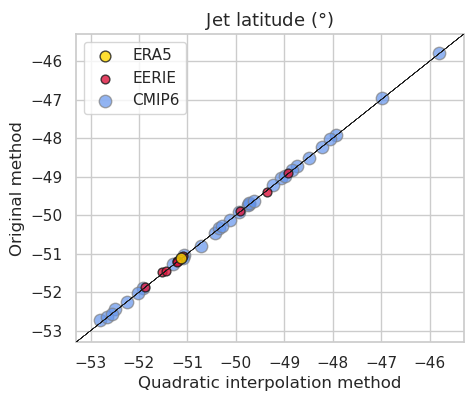

In [31]:
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(1,1,1)
ax.scatter(ERA5_jetinfo["jet_lat_annual_1"],ERA5_jetinfo["jet_lat_annual_3"], marker='o', s=60, c='gold',edgecolor='k',zorder=500, alpha=0.8,label='ERA5')
ax.scatter(IFSFESOMctl_jetinfo["jet_lat_annual_1"],IFSFESOMctl_jetinfo["jet_lat_annual_3"], marker='o', s=40, c='crimson',edgecolor='k', alpha=0.8, zorder=100)
ax.scatter(IFSFESOMhist_jetinfo["jet_lat_annual_1"],IFSFESOMhist_jetinfo["jet_lat_annual_3"], marker='o', s=40, c='crimson',edgecolor='k', alpha=0.8, zorder=100)
ax.scatter(ICONctl_jetinfo["jet_lat_annual_1"],ICONctl_jetinfo["jet_lat_annual_3"], marker='o', s=40, c='crimson',edgecolor='k', alpha=0.8, zorder=100)
ax.scatter(ICONhist_jetinfo["jet_lat_annual_1"],ICONhist_jetinfo["jet_lat_annual_3"], marker='o', s=40, c='crimson',edgecolor='k', alpha=0.8, zorder=100)
ax.scatter(HADGEMctl_jetinfo["jet_lat_annual_1"],HADGEMctl_jetinfo["jet_lat_annual_3"], marker='o', s=40, c='crimson',edgecolor='k',  alpha=0.8, zorder=100)
ax.scatter(AMIP9_jetinfo["jet_lat_annual_1"],AMIP9_jetinfo["jet_lat_annual_3"], marker='o', s=40, c='crimson',edgecolor='k', alpha=0.8, zorder=100)
ax.scatter(AMIP28_jetinfo["jet_lat_annual_1"][0],AMIP28_jetinfo["jet_lat_annual_3"][0], marker='o', s=40, c='crimson',edgecolor='k', alpha=0.8, zorder=100,label='EERIE')
ax.scatter(AMIP28_jetinfo["jet_lat_annual_1"][1],AMIP28_jetinfo["jet_lat_annual_3"][1], marker='o', s=40, c='crimson',edgecolor='k', alpha=0.8,zorder=100)
ax.scatter(AMIP28_jetinfo["jet_lat_annual_1"][2],AMIP28_jetinfo["jet_lat_annual_3"][2], marker='o', s=40, c='crimson',edgecolor='k', alpha=0.8, zorder=100)
ax.scatter(AMIP28_jetinfo["jet_lat_annual_1"][3],AMIP28_jetinfo["jet_lat_annual_3"][3], marker='o', s=40, c='crimson',edgecolor='k', alpha=0.8,zorder=100)
ax.scatter(AMIP28_jetinfo["jet_lat_annual_1"][4],AMIP28_jetinfo["jet_lat_annual_3"][4], marker='o', s=40, c='crimson',edgecolor='k', alpha=0.8, zorder=100)



for exp in range(31):
    if exp == 1:
        label='CMIP6'
    else:
        label=''
    ax.scatter(oCMIP6_jetloc[exp],CMIP6_jetloc[exp], marker='o', s=80, edgecolor='gray', c='cornflowerblue', alpha=0.7, label=label)
    ax.axline((0, 0), slope=1, linestyle='solid', color='k', linewidth=0.1, zorder=100)
    ax.set_xlim(-53.3, -45.3)
    ax.set_ylim(-53.3, -45.3)
    plt.ylabel('Original method', fontsize=12)
    plt.xlabel('Quadratic interpolation method', fontsize=12)
    ax.set_title('Jet latitude (' r'$\degree$'')', fontsize=13)
    plt.legend()
    plt.savefig('Jet_location_methods_comparison', bbox_inches='tight', dpi=200)
    #plt.plot(xrange, xrange, linestyle='dashed', color='k', linewidth=0.5, zorder=0)

In [22]:
IFSFESOM_atres =0.08
HADGEM_atres = 0.28
ICON_atres= 0.09

AMIP28_atres = 0.25
AMIP9_atres = 0.08

IFSFESOM_ocres = 0.11 #13~4.5 km
HADGEM_ocres = 0.07
ICON_ocres= 0.045

### Relationship between westerly jet lat & SAM timescale

CMIP annual
[0.46170992]
(0.40181656398448207, 0.025047555017107287)
EERIE annual
[1.39563207]
(0.749725920226231, 0.00788780095391397)
CMIP NDJ
[1.26645985]
(0.3768773250551078, 0.03662704347152629)
EERIE NDJ
[2.06560221]
(0.8626339832355752, 0.0006312344621791498)


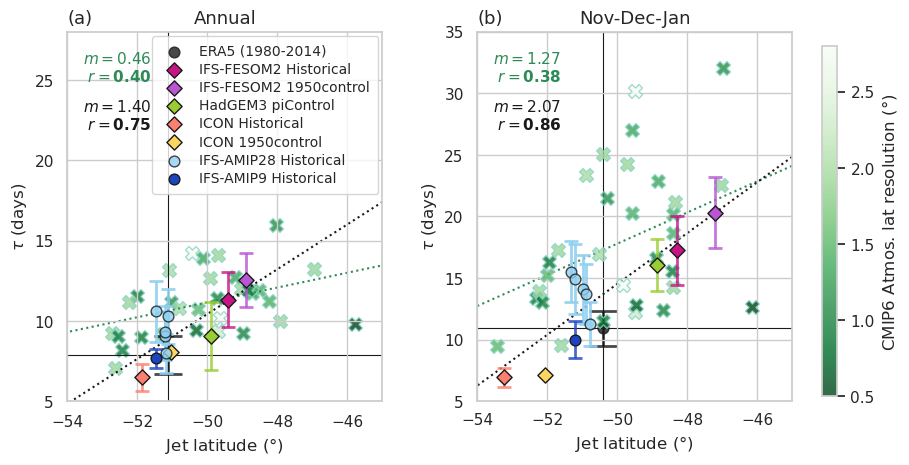

In [65]:
from sklearn.linear_model import LinearRegression
import scipy.stats

#scipy.stats.pearsonr(x, y)    # Pearson's r, p value

xmin=-55
xmax=-40
cmipmap='Greens_r'

cIFSFESOMhist = 'mediumvioletred'
cIFSFESOMctl  = 'mediumorchid'
cHADGEMctl    = 'yellowgreen'
cICONhist     = '#fb8072'
cICONctl      = '#fdd662'
cAMIP28       = '#90d0f0'
cAMIP9        = '#1d45bf'



fig = plt.figure(figsize=(10,4.8))


ax = fig.add_subplot(1, 2,1)

#-----------------------------------------------------------
### Regression of all  #IFSFESOMctl_jetloc
xeerie= np.array([IFSFESOMhist_jetloc, IFSFESOMctl_jetloc, HADGEMctl_jetloc, ICONhist_jetloc, ICONctl_jetloc, AMIP28_jetloc,AMIP28_jetloc2, AMIP28_jetloc3,AMIP28_jetloc4,AMIP28_jetloc5, AMIP9_jetloc])
xcmip = np.array([CMIP6_jetloc[exp] for exp in range(31)])
x = np.concatenate((xcmip, xeerie))

yeerie= np.array([IFSFESOMhist_tau, IFSFESOMctl_tau, HADGEMctl_tau, ICONhist_tau, ICONctl_tau, AMIP28_tau[0], AMIP28_tau[1], AMIP28_tau[2], AMIP28_tau[3], AMIP28_tau[4], AMIP9_tau])
ycmip = np.array([df_tau.iloc[exp,0] for exp in range(31)])
y = np.concatenate((ycmip, yeerie))

regression_model = LinearRegression()
regression_model.fit(x.reshape(-1,1), y)
slope = regression_model.coef_
#print(slope)
## Obtain the coefficient of determination by calling the model with the score() function, then print the coefficient:
r_sq = regression_model.score(x.reshape(-1,1), y)
#print('coefficient of determination:', r_sq)
Pearsonr= scipy.stats.pearsonr(x, y)
#print(Pearsonr)
xrange = np.arange(xmin, xmax+0.1, 0.1).reshape(-1,1)
y_pred = regression_model.predict(xrange)
#-----------------------------------------------------------
### Regression of CMIP only
regression_model.fit(xcmip.reshape(-1,1), ycmip)
slope_cmip = regression_model.coef_
print('CMIP annual')
print(slope_cmip)
#print('coefficient of determination:', r_sq)
Pearsonr_cmip= scipy.stats.pearsonr(xcmip, ycmip)
print(Pearsonr_cmip)
y_pred_cmip = regression_model.predict(xrange)
#-----------------------------------------------------------
### Regression of EERIE only
regression_model.fit(xeerie.reshape(-1,1), yeerie)
slope_eerie = regression_model.coef_
print('EERIE annual')
print(slope_eerie)
#print('coefficient of determination:', r_sq)
Pearsonr_eerie= scipy.stats.pearsonr(xeerie, yeerie)
print(Pearsonr_eerie)
y_pred_eerie = regression_model.predict(xrange)
#-----------------------------------------------------------
# Plotting 
for exp in range(31):
    p=plt.scatter(CMIP6_jetloc[exp], df_tau.iloc[exp,0],s=100, marker='X', c=CMIPatmres_lat[exp+1], edgecolor='#8dd3c7',cmap=cmipmap, alpha=0.8,vmin=0.5, vmax=2.8,zorder=0)
plt.plot(xrange,y_pred_cmip,color='seagreen', linewidth=1.5, linestyle='dotted',zorder=0)    
plt.plot(xrange,y_pred_eerie,color='0.1', linewidth=1.5, linestyle='dotted',zorder=0)  
ax.errorbar(ERA5_jetloc, ERA5_tau, yerr=ERA5_std, fmt='none', ms=9,capsize=10, capthick=2, elinewidth=2, color='k',zorder=0, alpha=0.8)
plt.scatter(ERA5_jetloc,  ERA5_tau, marker='o', s=60, edgecolor='k', color='k',label='ERA5 (1980-2014)',zorder=0, alpha=0.8)

ax.errorbar(IFSFESOMhist_jetloc, IFSFESOMhist_tau, yerr=IFSFESOMhist_std, fmt='none', ms=9,capsize=5, capthick=2, elinewidth=2, color=cIFSFESOMhist,zorder=1, alpha=0.8)
ax.errorbar(IFSFESOMctl_jetloc, IFSFESOMctl_tau, yerr=IFSFESOMctl_std, fmt='none', ms=9,capsize=5, capthick=2, elinewidth=2, color=cIFSFESOMctl,zorder=1, alpha=0.8)
ax.errorbar(HADGEMctl_jetloc, HADGEMctl_tau, yerr=HADGEMctl_std, fmt='none', ms=9,capsize=5, capthick=2, elinewidth=2, color=cHADGEMctl,zorder=1, alpha=0.8)
ax.errorbar(ICONhist_jetloc, ICONhist_tau, yerr=ICONhist_std, fmt='none', ms=9,capsize=5, capthick=2, elinewidth=2, color=cICONhist,zorder=1, alpha=0.8)
ax.errorbar(AMIP28_jetloc, AMIP28_tau[0], yerr=AMIP28_std[0], fmt='none', ms=9,capsize=5, capthick=2, elinewidth=2, color=cAMIP28,zorder=1, alpha=0.9)
ax.errorbar(AMIP28_jetloc2, AMIP28_tau[1], yerr=AMIP28_std[1], fmt='none', ms=9,capsize=5, capthick=2, elinewidth=2, color=cAMIP28,zorder=1, alpha=0.9)
ax.errorbar(AMIP28_jetloc3, AMIP28_tau[2], yerr=AMIP28_std[2], fmt='none', ms=9,capsize=5, capthick=2, elinewidth=2, color=cAMIP28,zorder=1, alpha=0.9)
ax.errorbar(AMIP28_jetloc4, AMIP28_tau[3], yerr=AMIP28_std[3], fmt='none', ms=9,capsize=5, capthick=2, elinewidth=2, color=cAMIP28,zorder=1, alpha=0.9)
ax.errorbar(AMIP28_jetloc5, AMIP28_tau[4], yerr=AMIP28_std[4], fmt='none', ms=9,capsize=5, capthick=2, elinewidth=2, color=cAMIP28,zorder=1, alpha=0.9)
ax.errorbar(AMIP9_jetloc, AMIP9_tau, yerr=AMIP9_std, fmt='none', ms=9,capsize=5, capthick=2, elinewidth=2, color=cAMIP9,zorder=1, alpha=0.8)

ax.scatter(IFSFESOMhist_jetloc, IFSFESOMhist_tau, marker='D', color=cIFSFESOMhist, edgecolor='k', linewidth=1, s= 60, alpha=1,label='IFS-FESOM2 Historical')
ax.scatter(IFSFESOMctl_jetloc, IFSFESOMctl_tau, marker='D', color=cIFSFESOMctl, edgecolor='k', linewidth=1, s= 60, alpha=1,label='IFS-FESOM2 1950control')
ax.scatter(HADGEMctl_jetloc, HADGEMctl_tau, marker='D', color=cHADGEMctl, edgecolor='k', linewidth=1, s= 60, alpha=1,label='HadGEM3 piControl')
ax.scatter(ICONhist_jetloc, ICONhist_tau, marker='D', color=cICONhist, edgecolor='k', linewidth=1, s= 60, alpha=1,label='ICON Historical')
ax.scatter(ICONctl_jetloc, ICONctl_tau, marker='D', color=cICONctl, edgecolor='k', linewidth=1, s= 60, alpha=1,label='ICON 1950control')
ax.scatter(AMIP28_jetloc, AMIP28_tau[0], marker='o', color=cAMIP28, edgecolor='k', linewidth=1, s= 60, alpha=0.8,label='IFS-AMIP28 Historical')
ax.scatter(AMIP28_jetloc2, AMIP28_tau[1], marker='o', color=cAMIP28, edgecolor='k', linewidth=1, s= 60, alpha=0.8)
ax.scatter(AMIP28_jetloc3, AMIP28_tau[2], marker='o', color=cAMIP28, edgecolor='k', linewidth=1, s= 60, alpha=0.8)
ax.scatter(AMIP28_jetloc4, AMIP28_tau[3], marker='o', color=cAMIP28, edgecolor='k', linewidth=1, s= 60, alpha=0.8)
ax.scatter(AMIP28_jetloc5, AMIP28_tau[4], marker='o', color=cAMIP28, edgecolor='k', linewidth=1, s= 60, alpha=0.8)
ax.scatter(AMIP9_jetloc, AMIP9_tau, marker='o', color=cAMIP9, edgecolor='k', linewidth=1, s= 60, alpha=1,label='IFS-AMIP9 Historical')

plt.axhline(y=ERA5_tau, color='k',linestyle='solid', linewidth=0.8,zorder=0)
plt.axvline(x=ERA5_jetloc, color='k',linestyle='solid', linewidth=0.8,zorder=0)

plt.ylim(5,28)
plt.xlim(-54,-45)
plt.ylabel('' r'$\tau$'' (days)')
plt.xlabel('Jet latitude (''' r'$\degree$'')')
#ax.set_xlabel('Atmospheric latitudinal resolution (degree)')
#ax.set_xlim(xmin,xmax)

#plt.text(0.05, 0.95, "m={:.2f}".format(slope[0])+"\n"r"$r^2$={:.2f}".format(r_sq), fontsize=10,
plt.text(0.05, 0.95, '' r'$m=$''{:.2f}'.format(slope_cmip[0])+'\n 'r'$r=$'r'$\mathbf{{{:.2f}}}$'.format(Pearsonr_cmip[0]), fontsize=11,
         horizontalalignment='left', color='seagreen',
         verticalalignment='top', 
         transform = ax.transAxes)

plt.text(0.05, 0.82, '' r'$m=$''{:.2f}'.format(slope_eerie[0])+'\n 'r'$r=$'r'$\mathbf{{{:.2f}}}$'.format(Pearsonr_eerie[0]), fontsize=11,
         horizontalalignment='left', color='0.1',
         verticalalignment='top',
         transform = ax.transAxes)

ax.legend(loc='upper right', fontsize=10,labelspacing=0.3,borderaxespad=0.3,borderpad=0.6)
plt.text(0., 1.06, '(a)', fontsize=13,
         horizontalalignment='left',
         verticalalignment='top',
         transform = ax.transAxes)
ax.set_title('Annual', size = 13)
ax.tick_params(direction='out', length=6)
#plt.grid(visible=None,color='None')

#================================================================

ax = fig.add_subplot(1, 2, 2)

#-----------------------------------------------
xeerie= np.array([IFSFESOMhist_jetlocNDJ, IFSFESOMctl_jetlocNDJ,HADGEMctl_jetlocNDJ, ICONhist_jetlocNDJ, ICONctl_jetlocNDJ, AMIP28_jetlocNDJ, AMIP28_jetlocNDJ2, AMIP28_jetlocNDJ3, AMIP28_jetlocNDJ4, AMIP28_jetlocNDJ5, AMIP9_jetlocNDJ])
xcmip = np.array([CMIP6_jetlocNDJ[exp] for exp in range(31)])
x = np.concatenate((xcmip, xeerie))

yeerie= np.array([IFSFESOMhist_NDJtau, IFSFESOMctl_NDJtau, HADGEMctl_NDJtau, ICONhist_NDJtau, ICONctl_NDJtau, AMIP28_NDJtau[0], AMIP28_NDJtau[1], AMIP28_NDJtau[2], AMIP28_NDJtau[3], AMIP28_NDJtau[4], AMIP9_NDJtau])
ycmip = np.array([df_tau.iloc[exp,1] for exp in range(31)])
y = np.concatenate((ycmip, yeerie))

regression_model = LinearRegression()
regression_model.fit(x.reshape(-1,1), y)
slope = regression_model.coef_
#print(slope)
## Obtain the coefficient of determination by calling the model with the score() function, then print the coefficient:
r_sq = regression_model.score(x.reshape(-1,1), y)
#print('coefficient of determination:', r_sq)
Pearsonr= scipy.stats.pearsonr(x, y)
xrange = np.arange(xmin, xmax+0.1, 0.1).reshape(-1,1)
y_pred = regression_model.predict(xrange)

#-----------------------------------------------------------
### Regression of CMIP only
regression_model.fit(xcmip.reshape(-1,1), ycmip)
slope_cmip = regression_model.coef_
print('CMIP NDJ')
print(slope_cmip)
#print('coefficient of determination:', r_sq)
Pearsonr_cmip= scipy.stats.pearsonr(xcmip, ycmip)
print(Pearsonr_cmip)
y_pred_cmip = regression_model.predict(xrange)
#-----------------------------------------------------------
### Regression of EERIE only
regression_model.fit(xeerie.reshape(-1,1), yeerie)
slope_eerie = regression_model.coef_
print('EERIE NDJ')
print(slope_eerie)
#print('coefficient of determination:', r_sq)
Pearsonr_eerie= scipy.stats.pearsonr(xeerie, yeerie)
print(Pearsonr_eerie)
y_pred_eerie = regression_model.predict(xrange)
#-----------------------------------------------------------

### Plotting 
for exp in range(31):
    p=plt.scatter(CMIP6_jetlocNDJ[exp], df_tau.iloc[exp,1], s=100, marker='X', c=CMIPatmres_lat[exp+1], edgecolor='#8dd3c7', cmap=cmipmap, alpha=0.8, vmin=0.5, vmax=2.8)
plt.plot(xrange,y_pred_cmip,color='seagreen', linewidth=1.5,linestyle='dotted', zorder=0)
plt.plot(xrange,y_pred_eerie,color='0.1', linewidth=1.5,linestyle='dotted', zorder=0)   
ax.errorbar(ERA5_jetlocNDJ, ERA5_NDJtau, yerr=ERA5_NDJstd, fmt='none', ms=9,capsize=10, capthick=2, elinewidth=2, color='k',zorder=0, alpha=0.8)
plt.scatter(ERA5_jetlocNDJ,  ERA5_NDJtau, marker='o', s=60, edgecolor='k',color='k',zorder=0, alpha=0.8)

ax.errorbar(IFSFESOMhist_jetlocNDJ, IFSFESOMhist_NDJtau, yerr=IFSFESOMhist_NDJstd, fmt='none', ms=9,capsize=5, capthick=2, elinewidth=2, color=cIFSFESOMhist,zorder=1, alpha=0.8)
ax.errorbar(IFSFESOMctl_jetlocNDJ, IFSFESOMctl_NDJtau, yerr=IFSFESOMctl_NDJstd, fmt='none', ms=9,capsize=5, capthick=2, elinewidth=2, color=cIFSFESOMctl,zorder=1, alpha=0.8)
ax.errorbar(HADGEMctl_jetlocNDJ, HADGEMctl_NDJtau, yerr=HADGEMctl_std, fmt='none', ms=9,capsize=5, capthick=2, elinewidth=2, color=cHADGEMctl,zorder=1, alpha=0.8)
ax.errorbar(ICONhist_jetlocNDJ, ICONhist_NDJtau, yerr=ICONhist_NDJstd, fmt='none', ms=9,capsize=5, capthick=2, elinewidth=2, color=cICONhist,zorder=1, alpha=0.8)
ax.errorbar(AMIP28_jetlocNDJ, AMIP28_NDJtau[0], yerr=AMIP28_NDJstd[0], fmt='none', ms=9,capsize=5, capthick=2, elinewidth=2, color=cAMIP28,zorder=1, alpha=0.9)
ax.errorbar(AMIP28_jetlocNDJ2, AMIP28_NDJtau[1], yerr=AMIP28_NDJstd[1], fmt='none', ms=9,capsize=5, capthick=2, elinewidth=2, color=cAMIP28,zorder=1, alpha=0.9)
ax.errorbar(AMIP28_jetlocNDJ3, AMIP28_NDJtau[2], yerr=AMIP28_NDJstd[2], fmt='none', ms=9,capsize=5, capthick=2, elinewidth=2, color=cAMIP28,zorder=1, alpha=0.9)
ax.errorbar(AMIP28_jetlocNDJ4, AMIP28_NDJtau[3], yerr=AMIP28_NDJstd[3], fmt='none', ms=9,capsize=5, capthick=2, elinewidth=2, color=cAMIP28,zorder=1, alpha=0.9)
ax.errorbar(AMIP28_jetlocNDJ5, AMIP28_NDJtau[4], yerr=AMIP28_NDJstd[4], fmt='none', ms=9,capsize=5, capthick=2, elinewidth=2, color=cAMIP28,zorder=1, alpha=0.9)
ax.errorbar(AMIP9_jetlocNDJ, AMIP9_NDJtau, yerr=AMIP9_NDJstd, fmt='none', ms=9,capsize=5, capthick=2, elinewidth=2, color=cAMIP9,zorder=1, alpha=0.8)
            
ax.scatter(IFSFESOMhist_jetlocNDJ, IFSFESOMhist_NDJtau, marker='D', color=cIFSFESOMhist, edgecolor='k', linewidth=1, s= 60, alpha=1,label='IFSFESOM hist')
ax.scatter(IFSFESOMctl_jetlocNDJ, IFSFESOMctl_NDJtau, marker='D', color=cIFSFESOMctl, edgecolor='k', linewidth=1, s= 60, alpha=1,label='IFSFESOM control')
ax.scatter(HADGEMctl_jetlocNDJ, HADGEMctl_NDJtau, marker='D', color=cHADGEMctl, edgecolor='k', linewidth=1, s= 60, alpha=1,label='HadGEM piControl')
ax.scatter(ICONhist_jetlocNDJ, ICONhist_NDJtau, marker='D', color=cICONhist, edgecolor='k', linewidth=1, s= 60, alpha=1,label='ICON hist')
ax.scatter(ICONctl_jetlocNDJ, ICONctl_NDJtau, marker='D', color=cICONctl, edgecolor='k', linewidth=1, s= 60, alpha=1,label='ICON control')
ax.scatter(AMIP28_jetlocNDJ, AMIP28_NDJtau[0], marker='o', color=cAMIP28, edgecolor='k', linewidth=1, s= 60, alpha=0.8,label='AMIP28 hist')
ax.scatter(AMIP28_jetlocNDJ2, AMIP28_NDJtau[1], marker='o', color=cAMIP28, edgecolor='k', linewidth=1, s= 60, alpha=0.8)
ax.scatter(AMIP28_jetlocNDJ3, AMIP28_NDJtau[2], marker='o', color=cAMIP28, edgecolor='k', linewidth=1, s= 60, alpha=0.8)
ax.scatter(AMIP28_jetlocNDJ4, AMIP28_NDJtau[3], marker='o', color=cAMIP28, edgecolor='k', linewidth=1, s= 60, alpha=0.8)
ax.scatter(AMIP28_jetlocNDJ5, AMIP28_NDJtau[4], marker='o', color=cAMIP28, edgecolor='k', linewidth=1, s= 60, alpha=0.8)
ax.scatter(AMIP9_jetlocNDJ, AMIP9_NDJtau, marker='o', color=cAMIP9, edgecolor='k', linewidth=1, s= 60, alpha=1,label='AMIP9 hist')


plt.axhline(y=ERA5_NDJtau, color='k',linestyle='solid', linewidth=0.8,zorder=0)
plt.axvline(x=ERA5_jetlocNDJ, color='k',linestyle='solid', linewidth=0.8,zorder=0)

#ax.set_xlabel('Atmospheric longitudinal resolution (degree)')
#plt.ylabel('e-folding timescale, ' r'$\tau$'' (days)')
plt.ylabel('' r'$\tau$'' (days)')
plt.xlabel('Jet latitude (''' r'$\degree$'')')
plt.ylim(5,35)
plt.xlim(-54,-45)
ax.set_xticks(np.arange(-54,-44,2))
#ax.set_xlim(xmin,xmax)

#plt.text(0.05, 0.95, "m={:.2f}".format(slope[0])+"\n"r"$r^2$={:.2f}".format(Pearsonr), fontsize=10,

plt.text(0.05, 0.95, '' r'$m=$''{:.2f}'.format(slope_cmip[0])+'\n 'r'$r=$'r'$\mathbf{{{:.2f}}}$'.format(Pearsonr_cmip[0]),
         fontsize=11,
         horizontalalignment='left', color='seagreen',
         verticalalignment='top',
         transform = ax.transAxes)

plt.text(0.05, 0.82, '' r'$m=$''{:.2f}'.format(slope_eerie[0])+'\n 'r'$r=$'r'$\mathbf{{{:.2f}}}$'.format(Pearsonr_eerie[0]), fontsize=11,
         horizontalalignment='left', color='0.1',
         verticalalignment='top', 
         transform = ax.transAxes)

ax.set_title('Nov-Dec-Jan', size = 13)

plt.subplots_adjust(right=0.85)
cax = plt.axes((0.88, 0.12, 0.015, 0.73))
plt.colorbar(p, cax=cax, label='CMIP6 Atmos. lat resolution (''' r'$\degree$'')')
plt.text(0., 1.06, '(b)', fontsize=13,
         horizontalalignment='left',
         verticalalignment='top',
         transform = ax.transAxes)


#plt.legend()
plt.subplots_adjust(wspace=0.3)
plt.savefig('Figure3_SAMtimescale_jetloc_dependency_revision', bbox_inches='tight', dpi=200)
plt.show()